Accuracy: 80.00%


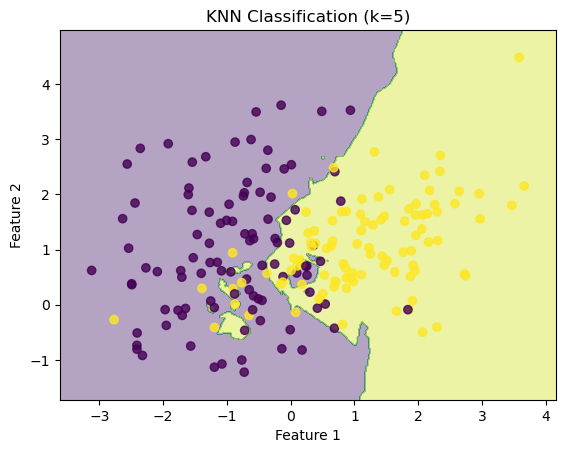

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 创建模拟数据
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义KNN分类器
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# 模型训练
knn.fit(X_train, y_train)

# 模型预测
y_pred = knn.predict(X_test)

# 计算准确率
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc*100))

# 可视化分类结果
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.title("KNN Classification (k={})".format(k))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
